# Webscraping on basketreference.com

## Scraping for one team Performances per season

In [1]:
import requests as r
from bs4 import BeautifulSoup
import pandas as pd
import adaptive
import time
import numpy as np
import matplotlib.pyplot as plt

In [3]:
url='https://www.basketball-reference.com/teams/BOS/'

In [4]:
response=r.get(url)

In [5]:
response

<Response [200]>

In [6]:
celtic_soup=BeautifulSoup(response.content)

In [7]:
team=[i.text for i in celtic_soup.select('tbody td.left[data-stat="team_name"]>a')]
year =[i.text for i in celtic_soup.select('tbody tr th a')]
wins=[i.text for i in celtic_soup.select('tbody td.right[data-stat="wins"]')]
losses=[i.text for i in celtic_soup.select('tbody td.right[data-stat="losses"]')]
win_loss_pct=[i.text for i in celtic_soup.select('tbody td.right[data-stat="win_loss_pct"]')]
srs=[i.text for i in celtic_soup.select('tbody td.right[data-stat="srs"]')]
pace=[i.text for i in celtic_soup.select('tbody td.right[data-stat="pace"]')]
off_rtg=[i.text for i in celtic_soup.select('tbody td.right[data-stat="off_rtg"]')]
def_rtg=[i.text for i in celtic_soup.select('tbody td.right[data-stat="def_rtg"]')]
rank_team_playoffs=[i.text for i in celtic_soup.select('tbody td.left[data-stat="rank_team_playoffs"]')]

In [9]:
data={
    'team':team,
    'year':year,
    'wins':wins,
    'losses':losses,
    'win_loss_pct':win_loss_pct,
    'srs':srs,
    'pace':pace,
    'off_rtg':off_rtg,
    'def_rtg':def_rtg,
    'rank_team_playoffs':rank_team_playoffs    
}

In [10]:
df=pd.DataFrame(data)

In [11]:
df.head()

,team,year,wins,losses,win_loss_pct,srs,pace,off_rtg,def_rtg,rank_team_playoffs
0,Boston Celtics,2020-21,0,0,,,,,,
1,Boston Celtics,2019-20,48,24,.667,5.83,99.5,113.3,107.0,Lost E. Conf. Finals
2,Boston Celtics,2018-19,49,33,.598,3.90,99.6,112.2,107.8,Lost E. Conf. Semis
3,Boston Celtics,2017-18,55,27,.671,3.23,96.0,107.6,103.9,Lost E. Conf. Finals
4,Boston Celtics,2016-17,53,29,.646,2.25,96.8,111.2,108.4,Lost E. Conf. Finals


## Scraping one team basics stats per season

In [12]:
url='https://www.basketball-reference.com/teams/BOS/stats_basic_totals.html'

In [13]:
response=r.get(url)

In [14]:
response

<Response [200]>

In [15]:
soup=BeautifulSoup(response.content)

In [16]:
team=[i.text for i in soup.select('tbody td.left[data-stat="team_id"]>a')]
year=[i.text for i in soup.select('tbody tr th a')]
points=[i.text for i in soup.select('tbody td.right[data-stat="pts"]')]
field_goal=[i.text for i in soup.select('tbody td.right[data-stat="fg"]')]
field_goal_pct=[i.text for i in soup.select('tbody td.right[data-stat="fg_pct"]')]
rebounds=[i.text for i in soup.select('tbody td.right[data-stat="trb"]')]
assists=[i.text for i in soup.select('tbody td.right[data-stat="ast"]')]
steals=[i.text for i in soup.select('tbody td.right[data-stat="stl"]')]
blocks=[i.text for i in soup.select('tbody td.right[data-stat="blk"]')]
turnovers=[i.text for i in soup.select('tbody td.right[data-stat="tov"]')]

In [17]:
data={
    'team':team,
    'year':year,
    'points':points,
    'field_goal':field_goal,
    'field_goal_pct':field_goal_pct,
    'rebounds':rebounds,
    'assists':assists,
    'steals':steals,
    'blocks':blocks,
    'turnovers':turnovers    
}

In [18]:
df = pd.DataFrame.from_dict(data, orient='index').transpose()

In [19]:
df.head()

,team,year,points,field_goal,field_goal_pct,rebounds,assists,steals,blocks,turnovers
0,BOS,2019-20,8183,2971,.461,3317,1655,595,406,995
1,BOS,2018-19,9216,3451,.465,3653,2155,706,435,1052
2,BOS,2017-18,8529,3141,.450,3645,1842,604,373,1149
3,BOS,2016-17,8857,3168,.454,3442,2069,617,340,1088
4,BOS,2015-16,8669,3216,.439,3683,1981,752,348,1127


## Scraping all teams performance per season

Get the alias and add it to the URL to loop between the different pages and scrap the datas into each of those. 

Select only the active teams by adding `div[id="all_teams_active"]`

In [20]:
# url of the page for all the teams
urlpage = 'https://www.basketball-reference.com/teams/'
response=(r.get(urlpage))
soup = BeautifulSoup(response.content)
URL=[i.get("href") for i in soup.select('div[id="all_teams_active"] tbody tr th a')]
teams_URL = ['https://www.basketball-reference.com'+i for i in URL]

create a dataframe which agregate all the datas for the different teams

In [21]:
df_teams=pd.DataFrame()
for i in teams_URL:
    response=r.get(i)
    time.sleep(5)
    soup=(BeautifulSoup(response.content))
    team=[i.text for i in soup.select('tbody td.left[data-stat="team_name"]>a')]
    year =[i.text for i in soup.select('tbody tr th a')]
    wins=[i.text for i in soup.select('tbody td.right[data-stat="wins"]')]
    losses=[i.text for i in soup.select('tbody td.right[data-stat="losses"]')]
    win_loss_pct=[i.text for i in soup.select('tbody td.right[data-stat="win_loss_pct"]')]
    srs=[i.text for i in soup.select('tbody td.right[data-stat="srs"]')]
    pace=[i.text for i in soup.select('tbody td.right[data-stat="pace"]')]
    off_rtg=[i.text for i in soup.select('tbody td.right[data-stat="off_rtg"]')]
    def_rtg=[i.text for i in soup.select('tbody td.right[data-stat="def_rtg"]')]
    rank_team_playoffs=[i.text for i in soup.select('tbody td.left[data-stat="rank_team_playoffs"]')]
    data={
    'team':team,
    'year':year,
    'wins':wins,
    'losses':losses,
    'win_loss_pct':win_loss_pct,
    'srs':srs,
    'pace':pace,
    'off_rtg':off_rtg,
    'def_rtg':def_rtg,
    'rank_team_playoffs':rank_team_playoffs    
}
    df=pd.DataFrame(data)
    df_teams=df_teams.append(df)
    print(i, "is done!")

https://www.basketball-reference.com/teams/ATL/ is done!
https://www.basketball-reference.com/teams/BOS/ is done!
https://www.basketball-reference.com/teams/NJN/ is done!
https://www.basketball-reference.com/teams/CHA/ is done!
https://www.basketball-reference.com/teams/CHI/ is done!
https://www.basketball-reference.com/teams/CLE/ is done!
https://www.basketball-reference.com/teams/DAL/ is done!
https://www.basketball-reference.com/teams/DEN/ is done!
https://www.basketball-reference.com/teams/DET/ is done!
https://www.basketball-reference.com/teams/GSW/ is done!
https://www.basketball-reference.com/teams/HOU/ is done!
https://www.basketball-reference.com/teams/IND/ is done!
https://www.basketball-reference.com/teams/LAC/ is done!
https://www.basketball-reference.com/teams/LAL/ is done!
https://www.basketball-reference.com/teams/MEM/ is done!
https://www.basketball-reference.com/teams/MIA/ is done!
https://www.basketball-reference.com/teams/MIL/ is done!
https://www.basketball-referenc

In [22]:
df_teams.shape

(1573, 10)

In [23]:
df_teams.sample(10)

,team,year,wins,losses,win_loss_pct,srs,pace,off_rtg,def_rtg,rank_team_playoffs
28,Chicago Bulls,1992-93,57,25,.695,6.19,92.5,112.9,106.1,Won Finals
44,Cleveland Cavaliers,1976-77,43,39,.524,1.08,101.5,100.0,98.9,Lost E. Conf. 1st Rnd.
18,Los Angeles Lakers,2002-03,50,32,.610,2.71,92.5,107.2,104.7,Lost W. Conf. Semis
40,San Diego Clippers,1980-81,36,46,.439,-1.78,100.2,106.0,107.6,
4,New York Knicks,2016-17,31,51,.378,-3.87,96.0,107.7,111.5,
3,Oklahoma City Thunder,2017-18,48,34,.585,3.42,96.7,110.7,107.2,Lost W. Conf. 1st Rnd.
64,Philadelphia Warriors,1956-57,37,35,.514,1.54,108.0,92.4,90.9,Lost E. Div. Semis
29,New York Knicks,1991-92,51,31,.622,3.67,92.9,108.3,104.2,Lost E. Conf. Semis
0,Sacramento Kings,2020-21,0,0,,,,,,
20,Denver Nuggets,2000-01,40,42,.488,-1.83,92.6,103.7,106.3,


## Scraping all teams basic stats per season

In [24]:
# url of the page for all the teams
urlpage = 'https://www.basketball-reference.com/teams/'
response=(r.get(urlpage))
time.sleep(1)
soup = BeautifulSoup(response.content)
URL=[i.get("href") for i in soup.select('div[id="all_teams_active"] tbody tr th a')]
teams_URL = ['https://www.basketball-reference.com'+i+'stats_basic_totals.html' for i in URL]

In [25]:
df_basic_stats=pd.DataFrame()
for i in teams_URL:
    response=r.get(i)
    time.sleep(5)
    soup=(BeautifulSoup(response.content))
    team=[i.text for i in soup.select('tbody td.left[data-stat="team_id"]>a')]
    year=[i.text for i in soup.select('tbody tr th a')]
    points=[i.text for i in soup.select('tbody td.right[data-stat="pts"]')]
    field_goal=[i.text for i in soup.select('tbody td.right[data-stat="fg"]')]
    field_goal_pct=[i.text for i in soup.select('tbody td.right[data-stat="fg_pct"]')]
    rebounds=[i.text for i in soup.select('tbody td.right[data-stat="trb"]')]
    assists=[i.text for i in soup.select('tbody td.right[data-stat="ast"]')]
    steals=[i.text for i in soup.select('tbody td.right[data-stat="stl"]')]
    blocks=[i.text for i in soup.select('tbody td.right[data-stat="blk"]')]
    turnovers=[i.text for i in soup.select('tbody td.right[data-stat="tov"]')]
    data={
    'team':team,
    'year':year,
    'points':points,
    'field_goal':field_goal,
    'field_goal_pct':field_goal_pct,
    'rebounds':rebounds,
    'assists':assists,
    'steals':steals,
    'blocks':blocks,
    'turnovers':turnovers    
}
    df=pd.DataFrame.from_dict(data, orient='index').transpose()
    df_basic_stats=df_basic_stats.append(df)
    print(i, "is done!")

https://www.basketball-reference.com/teams/ATL/stats_basic_totals.html is done!
https://www.basketball-reference.com/teams/BOS/stats_basic_totals.html is done!
https://www.basketball-reference.com/teams/NJN/stats_basic_totals.html is done!
https://www.basketball-reference.com/teams/CHA/stats_basic_totals.html is done!
https://www.basketball-reference.com/teams/CHI/stats_basic_totals.html is done!
https://www.basketball-reference.com/teams/CLE/stats_basic_totals.html is done!
https://www.basketball-reference.com/teams/DAL/stats_basic_totals.html is done!
https://www.basketball-reference.com/teams/DEN/stats_basic_totals.html is done!
https://www.basketball-reference.com/teams/DET/stats_basic_totals.html is done!
https://www.basketball-reference.com/teams/GSW/stats_basic_totals.html is done!
https://www.basketball-reference.com/teams/HOU/stats_basic_totals.html is done!
https://www.basketball-reference.com/teams/IND/stats_basic_totals.html is done!
https://www.basketball-reference.com/tea

In [26]:
df_basic_stats.sample(10)

,team,year,points,field_goal,field_goal_pct,rebounds,assists,steals,blocks,turnovers
36,MIL,1983-84,8666,3432,.492,3520,2113,642,489,1415
36,DET,1983-84,9602,3798,.480,3861,2256,697,417,1310
52,BAL,1967-68,9627,3691,.438,5431,1534,,,
43,BUF,1976-77,8612,3366,.450,3836,1883,683,392,1699
19,DET,2000-01,7837,2919,.424,3734,1629,613,447,1304
65,ROC,1954-55,6535,2399,.399,3904,1695,,,
28,POR,1991-92,9135,3476,.473,3843,2065,753,410,1328
17,NYK,2002-03,7860,2967,.441,3218,1800,579,255,1149
42,CLE,1977-78,8561,3496,.454,3863,1740,692,455,1382
9,PHI,2010-11,8119,3125,.461,3428,1861,621,355,1063


The difference of 30 rows between the 2 DataFrames is related to the addition of a row for the 2020-21 season for all the franchises in the team performance index.

# Data Cleaning

## Performances per season DataFrame

### Info about the DataFrame

In [27]:
df_teams.shape

(1573, 10)

In [28]:
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1573 entries, 0 to 59
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   team                1573 non-null   object
 1   year                1573 non-null   object
 2   wins                1573 non-null   object
 3   losses              1573 non-null   object
 4   win_loss_pct        1573 non-null   object
 5   srs                 1573 non-null   object
 6   pace                1573 non-null   object
 7   off_rtg             1573 non-null   object
 8   def_rtg             1573 non-null   object
 9   rank_team_playoffs  1573 non-null   object
dtypes: object(10)
memory usage: 135.2+ KB


In [29]:
df_teams.describe()

,team,year,wins,losses,win_loss_pct,srs,pace,off_rtg,def_rtg,rank_team_playoffs
count,1573,1573,1573,1573,1573,1573,1573,1573,1573,1573
unique,62,75,66,64,225,1003,360,288,275,22
top,New York Knicks,2018-19,41,41,.500,,,,,
freq,75,30,59,56,58,30,50,50,50,665


**What must be changed**

1. Need to drop the rows 2020-21 for each team: the season didn't even start.
2. Problem with the values, because it's objects and not int or float. 
    - Need to change columns wins and losses to integer
    - Need to change columns win_loss_pct, srs, pace, off_rtg and def_rtg to float.
3. The rank_team_playoffs column must be normalize to help the data analysis something less specific to each season: as the league changed many times, different names have been used for the same stages.

To avoid problems with the DataFrame if there is a problem, a backup copy has to be done.

In [30]:
backup=df_teams.copy()

### Drop season 2020-21

In [31]:
df_teams.year[df_teams.year == '2020-21'].count()

30

In [32]:
df_teams=df_teams.drop(df_teams[df_teams.year == '2020-21'].index, axis=0)

In [33]:
df_teams.shape

(1543, 10)

The 30 rows 2020-21 have been dropped, for each present franchise in NBA.

### Change the values to Int & Float

For the moment, every columns contains objects. That's why describe don't give any useful values.
So the values for the analysis could be done.

In [34]:
df_teams.dtypes

team                  object
year                  object
wins                  object
losses                object
win_loss_pct          object
srs                   object
pace                  object
off_rtg               object
def_rtg               object
rank_team_playoffs    object
dtype: object

In [35]:
df_teams=df_teams.astype({"wins": int, "losses": int})

In [36]:
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1543 entries, 1 to 59
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   team                1543 non-null   object
 1   year                1543 non-null   object
 2   wins                1543 non-null   int32 
 3   losses              1543 non-null   int32 
 4   win_loss_pct        1543 non-null   object
 5   srs                 1543 non-null   object
 6   pace                1543 non-null   object
 7   off_rtg             1543 non-null   object
 8   def_rtg             1543 non-null   object
 9   rank_team_playoffs  1543 non-null   object
dtypes: int32(2), object(8)
memory usage: 120.5+ KB


In [37]:
df_teams=df_teams.astype({"wins": int, "losses": int})
df_teams['win_loss_pct']=pd.to_numeric(df_teams['win_loss_pct'], downcast='float')
df_teams['srs']=pd.to_numeric(df_teams['srs'], downcast='float')
df_teams['pace']=pd.to_numeric(df_teams['pace'], downcast='float')
df_teams['off_rtg']=pd.to_numeric(df_teams['off_rtg'], downcast='float')
df_teams['def_rtg']=pd.to_numeric(df_teams['def_rtg'], downcast='float')

df_teams.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1543 entries, 1 to 59
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   team                1543 non-null   object 
 1   year                1543 non-null   object 
 2   wins                1543 non-null   int32  
 3   losses              1543 non-null   int32  
 4   win_loss_pct        1543 non-null   float32
 5   srs                 1543 non-null   float32
 6   pace                1523 non-null   float32
 7   off_rtg             1523 non-null   float32
 8   def_rtg             1523 non-null   float32
 9   rank_team_playoffs  1543 non-null   object 
dtypes: float32(5), int32(2), object(3)
memory usage: 90.4+ KB


The columns used for the analyse will are changed, the others will be use in another way.

Now is it possible to normalize the `rank_team_playoffs` column?

In [38]:
# What are the differents values?
df_teams.rank_team_playoffs.unique()

array(['', 'Lost E. Conf. 1st Rnd.', 'Lost E. Conf. Semis',
       'Lost E. Conf. Finals', 'Lost W. Div. Finals',
       'Lost W. Div. Semis', 'Lost Finals', 'Won Finals',
       'Lost E. Div. Finals', 'Lost E. Div. Semis', 'Lost Quarterfinals',
       'Lost W. Conf. 1st Rnd.', 'Lost W. Conf. Finals',
       'Lost W. Conf. Semis', 'Lost W. Div. Tiebreaker',
       'Eliminated in W. Div. Rnd. Robin', 'Lost Central Div. Finals',
       'Lost 1st Rnd.', 'Lost E. Div. Third Place Tiebreaker',
       'Eliminated in E. Div. Rnd. Robin', 'Lost Semis',
       'Lost Central Div. Semis'], dtype=object)

It's not relevant to know if a team lose at East or West, so those elements can be replaced.
Empty means "no playoffs", so it can be replaced by that 
To simplify the analysis, the different values will be replaced by `'No playoffs'` `'Lost Conf. Semis Rnd.'` `'Lost Conf. Finals'` `'Lost Finals'` `'Won Finals`.

In [41]:
df_teams.rank_team_playoffs=df_teams.rank_team_playoffs.replace('', 'No playoffs')
df_teams.rank_team_playoffs=df_teams.rank_team_playoffs.replace('Lost E. Conf. 1st Rnd.', 'Lost Conf. 1st Rnd.')
df_teams.rank_team_playoffs=df_teams.rank_team_playoffs.replace('Lost W. Conf. 1st Rnd.', 'Lost Conf. 1st Rnd.')
df_teams.rank_team_playoffs=df_teams.rank_team_playoffs.replace('Lost E. Conf. Semis', 'Lost Conf. Semis Rnd.')
df_teams.rank_team_playoffs=df_teams.rank_team_playoffs.replace('Lost W. Conf. Semis', 'Lost Conf. Semis Rnd.')
df_teams.rank_team_playoffs=df_teams.rank_team_playoffs.replace('Lost E. Div. Semis', 'Lost Conf. Semis Rnd.')
df_teams.rank_team_playoffs=df_teams.rank_team_playoffs.replace('Lost Central Div. Semis', 'Lost Conf. Semis Rnd.')
df_teams.rank_team_playoffs=df_teams.rank_team_playoffs.replace('Lost W. Div. Semis', 'Lost Conf. Semis Rnd.')
df_teams.rank_team_playoffs=df_teams.rank_team_playoffs.replace('Lost E. Div. Finals', 'Lost Conf. Finals')
df_teams.rank_team_playoffs=df_teams.rank_team_playoffs.replace('Lost E. Conf. Finals', 'Lost Conf. Finals')
df_teams.rank_team_playoffs=df_teams.rank_team_playoffs.replace('Lost W. Conf. Finals', 'Lost Conf. Finals')
df_teams.rank_team_playoffs=df_teams.rank_team_playoffs.replace('Lost Central Div. Finals', 'Lost Conf. Semis Rnd.')
df_teams.rank_team_playoffs=df_teams.rank_team_playoffs.replace('Lost W. Div. Finals', 'Lost Conf. Finals')
df_teams.rank_team_playoffs=df_teams.rank_team_playoffs.replace('Lost Quarterfinals', 'Lost Conf. Semis Rnd.')
df_teams.rank_team_playoffs=df_teams.rank_team_playoffs.replace('Lost Semis', 'Lost Conf. Finals')
df_teams.rank_team_playoffs=df_teams.rank_team_playoffs.replace('Lost E. Div. Third Place Tiebreaker', 'No playoffs')
df_teams.rank_team_playoffs=df_teams.rank_team_playoffs.replace('Lost W. Div. Tiebreaker', 'No playoffs')
df_teams.rank_team_playoffs=df_teams.rank_team_playoffs.replace('Eliminated in E. Div. Rnd. Robin', 'No playoffs')
df_teams.rank_team_playoffs=df_teams.rank_team_playoffs.replace('Eliminated in W. Div. Rnd. Robin', 'No playoffs')
df_teams.rank_team_playoffs=df_teams.rank_team_playoffs.replace('Lost 1st Rnd.', 'Lost Conf. 1st Rnd.')

df_teams.rank_team_playoffs.unique()

array(['No playoffs', 'Lost Conf. 1st Rnd.', 'Lost Conf. Semis Rnd.',
       'Lost Conf. Finals', 'Lost Finals', 'Won Finals'], dtype=object)

In [42]:
df_teams.rank_team_playoffs.nunique()

6

Now that the DataFrame is normalized, it will be more useful and easier for the analysis.

### New Index

The index must be in the alphabethical order for the moment to help the next steps.

In [43]:
df_teams.sample(5)

,team,year,wins,losses,win_loss_pct,srs,pace,off_rtg,def_rtg,rank_team_playoffs
67,Philadelphia Warriors,1953-54,29,43,0.403,-1.89,89.400002,86.699997,89.000000,No playoffs
21,Seattle SuperSonics,1999-00,45,37,0.549,1.17,93.400002,105.599998,104.599998,Lost Conf. 1st Rnd.
43,Detroit Pistons,1977-78,38,44,0.463,-1.22,107.699997,100.300003,101.500000,No playoffs
25,San Antonio Spurs,1995-96,59,23,0.720,5.98,93.300003,110.199997,103.500000,Lost Conf. Semis Rnd.
32,Washington Bullets,1988-89,40,42,0.488,-1.77,100.800003,106.400002,108.500000,No playoffs


In [44]:
# How many rows will we need
nrows=df_teams.shape[0]
# now let's create an index with these rows
index=pd.Index(range(nrows), name='Rows')
# replace the index
df_teams.set_index(index, inplace = True)

In [45]:
df_teams.sample(5)

,team,year,wins,losses,win_loss_pct,srs,pace,off_rtg,def_rtg,rank_team_playoffs
Rows,,,,,,,,,,
291,Cleveland Cavaliers,2010-11,19,63,0.232,-8.88,93.000000,102.199997,111.800003,No playoffs
1452,Utah Jazz,2005-06,41,41,0.500,-2.49,87.800003,104.099998,107.000000,No playoffs
980,New York Knicks,1996-97,57,25,0.695,3.31,90.500000,104.400002,101.000000,Lost Conf. Semis Rnd.
320,Cleveland Cavaliers,1981-82,15,67,0.183,-7.77,99.300003,103.300003,111.800003,No playoffs
53,St. Louis Hawks,1966-67,39,42,0.481,-1.44,117.699997,96.099998,97.400002,Lost Conf. Finals


### matpolib plot

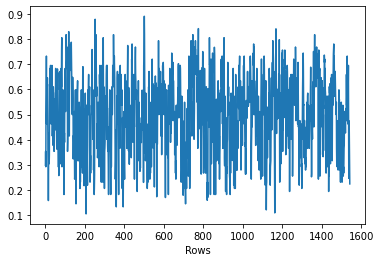

In [46]:
df_teams.win_loss_pct.plot()

### Change columns names

In [47]:
df_teams.columns

Index(['team', 'year', 'wins', 'losses', 'win_loss_pct', 'srs', 'pace',
       'off_rtg', 'def_rtg', 'rank_team_playoffs'],
      dtype='object')

In [48]:
df_teams.rename(columns={'team':'Team', 'year':'Year', 'wins':'Wins', 'losses':'Losses', 
                         'win_loss_pct':'Wins percentage', 'srs':'SRS', 'pace':'Pace', 
                         'off_rtg':'Offensive Rating', 'def_rtg':'Defensive Rating',
                         'rank_team_playoffs':'Playoffs'}, inplace=True)

df_teams

,Team,Year,Wins,Losses,Wins percentage,SRS,Pace,Offensive Rating,Defensive Rating,Playoffs
Rows,,,,,,,,,,
0,Atlanta Hawks,2019-20,20,47,0.299,-7.71,103.000000,107.199997,114.800003,No playoffs
1,Atlanta Hawks,2018-19,29,53,0.354,-6.06,103.900002,108.099998,113.900002,No playoffs
2,Atlanta Hawks,2017-18,24,58,0.293,-5.30,98.300003,105.000000,110.599998,No playoffs
3,Atlanta Hawks,2016-17,43,39,0.524,-1.23,97.400002,104.900002,105.699997,Lost Conf. 1st Rnd.
4,Atlanta Hawks,2015-16,48,34,0.585,3.49,97.099998,105.099998,101.400002,Lost Conf. Semis Rnd.
...,...,...,...,...,...,...,...,...,...,...
1538,Baltimore Bullets,1965-66,38,42,0.475,-1.06,123.099998,95.800003,96.800003,Lost Conf. Semis Rnd.
1539,Baltimore Bullets,1964-65,37,43,0.463,-1.97,116.199997,96.800003,98.699997,Lost Conf. Finals
1540,Baltimore Bullets,1963-64,31,49,0.388,-1.59,117.000000,95.000000,96.599998,No playoffs


##  Basic stats per season DataFrame

### Informations about the DataFrame

In [49]:
df_basic_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1543 entries, 0 to 58
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   team            1543 non-null   object
 1   year            1543 non-null   object
 2   points          1543 non-null   object
 3   field_goal      1543 non-null   object
 4   field_goal_pct  1543 non-null   object
 5   rebounds        1543 non-null   object
 6   assists         1543 non-null   object
 7   steals          1543 non-null   object
 8   blocks          1543 non-null   object
 9   turnovers       1543 non-null   object
dtypes: object(10)
memory usage: 132.6+ KB


In [50]:
df_basic_stats.shape

(1543, 10)

In [51]:
df_basic_stats.head()

,team,year,points,field_goal,field_goal_pct,rebounds,assists,steals,blocks,turnovers
0,ATL,2019-20,7488,2723,.449,2898,1605,523,341,1086
1,ATL,2018-19,9294,3392,.451,3780,2118,675,419,1397
2,ATL,2017-18,8475,3130,.446,3436,1946,638,348,1276
3,ATL,2016-17,8459,3123,.451,3635,1938,672,397,1294
4,ATL,2015-16,8433,3168,.458,3451,2100,747,486,1226


In [52]:
df_basic_stats.columns

Index(['team', 'year', 'points', 'field_goal', 'field_goal_pct', 'rebounds',
       'assists', 'steals', 'blocks', 'turnovers'],
      dtype='object')

**What must be changed**

1. Problem with the values, because it's object and not int or float. 
    - Need to change columns points, field_goal, rebounds, assists, steals, blocks, turnovers to integer
    - Need to change field_goal_pct to float.
2. The teams' names must be changed too : it's necessary that the columns correspond to the column team of the other DataFrame.


To avoid problems with the DataFrame if there is a problem, a backup copy has to be done.

In [65]:
backup_stats=df_basic_stats.copy()

In [53]:
df_basic_stats.dtypes

team              object
year              object
points            object
field_goal        object
field_goal_pct    object
rebounds          object
assists           object
steals            object
blocks            object
turnovers         object
dtype: object

In [54]:
df_basic_stats=df_basic_stats.astype({'points': int, 'field_goal': int, 'assists': int})
df_basic_stats['field_goal_pct']=pd.to_numeric(df_basic_stats['field_goal_pct'], downcast='float')

df_basic_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1543 entries, 0 to 58
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   team            1543 non-null   object 
 1   year            1543 non-null   object 
 2   points          1543 non-null   int32  
 3   field_goal      1543 non-null   int32  
 4   field_goal_pct  1543 non-null   float32
 5   rebounds        1543 non-null   object 
 6   assists         1543 non-null   int32  
 7   steals          1543 non-null   object 
 8   blocks          1543 non-null   object 
 9   turnovers       1543 non-null   object 
dtypes: float32(1), int32(3), object(6)
memory usage: 108.5+ KB


As rebounds, steals, blocks and turnovers are not complete columns (those statistics weren't counted before the 70's), the change must be done with `pd.to_numeric` function.

In [55]:
df_basic_stats['rebounds']=pd.to_numeric(df_basic_stats['rebounds'], downcast='integer')
df_basic_stats['steals']=pd.to_numeric(df_basic_stats['steals'], downcast='integer')
df_basic_stats['blocks']=pd.to_numeric(df_basic_stats['rebounds'], downcast='integer')
df_basic_stats['turnovers']=pd.to_numeric(df_basic_stats['turnovers'], downcast='integer')

df_basic_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1543 entries, 0 to 58
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   team            1543 non-null   object 
 1   year            1543 non-null   object 
 2   points          1543 non-null   int32  
 3   field_goal      1543 non-null   int32  
 4   field_goal_pct  1543 non-null   float32
 5   rebounds        1523 non-null   float64
 6   assists         1543 non-null   int32  
 7   steals          1265 non-null   float64
 8   blocks          1523 non-null   float64
 9   turnovers       1289 non-null   float64
dtypes: float32(1), float64(4), int32(3), object(2)
memory usage: 108.5+ KB


In [56]:
df_basic_stats.isna().sum()

team                0
year                0
points              0
field_goal          0
field_goal_pct      0
rebounds           20
assists             0
steals            278
blocks             20
turnovers         254
dtype: int64

The rows with no data won't be dropped : it's just informations that have not be counted at that time.

### Uniformization of the teams names 
Preparation for next step to have the same number of unique teams names': some teams have different aliases but the same name. For example, the Charlotte Hornets changed their name for the Charlotte Bobcats and came back to their original name. The alias was CHO at first, then CHA and CHH. To make is more regular, CHH will be replace for CHO.
If not, the 2 arrays will have different lengths and it will be impossible to create a dictionnary with these arrays.

In [57]:
df_basic_stats.team.unique()

array(['ATL', 'STL', 'MLH', 'TRI', 'BOS', 'BRK', 'NJN', 'NYN', 'NYA',
       'NJA', 'CHO', 'CHA', 'CHH', 'CHI', 'CLE', 'DAL', 'DEN', 'DNA',
       'DNR', 'DET', 'FTW', 'GSW', 'SFW', 'PHW', 'HOU', 'SDR', 'IND',
       'INA', 'LAC', 'SDC', 'BUF', 'LAL', 'MNL', 'MEM', 'VAN', 'MIA',
       'MIL', 'MIN', 'NOP', 'NOH', 'NOK', 'NYK', 'OKC', 'SEA', 'ORL',
       'PHI', 'SYR', 'PHO', 'POR', 'SAC', 'KCK', 'KCO', 'CIN', 'ROC',
       'SAS', 'SAA', 'DLC', 'TEX', 'TOR', 'UTA', 'NOJ', 'WAS', 'WSB',
       'CAP', 'BAL', 'CHZ', 'CHP'], dtype=object)

In [58]:
df_teams.Team.unique()

array(['Atlanta Hawks', 'St. Louis Hawks', 'Milwaukee Hawks',
       'Tri-Cities Blackhawks', 'Boston Celtics', 'Brooklyn Nets',
       'New Jersey Nets', 'New York Nets', 'New Jersey Americans',
       'Charlotte Hornets', 'Charlotte Bobcats', 'Chicago Bulls',
       'Cleveland Cavaliers', 'Dallas Mavericks', 'Denver Nuggets',
       'Denver Rockets', 'Detroit Pistons', 'Fort Wayne Pistons',
       'Golden State Warriors', 'San Francisco Warriors',
       'Philadelphia Warriors', 'Houston Rockets', 'San Diego Rockets',
       'Indiana Pacers', 'Los Angeles Clippers', 'San Diego Clippers',
       'Buffalo Braves', 'Los Angeles Lakers', 'Minneapolis Lakers',
       'Memphis Grizzlies', 'Vancouver Grizzlies', 'Miami Heat',
       'Milwaukee Bucks', 'Minnesota Timberwolves',
       'New Orleans Pelicans', 'New Orleans Hornets',
       'New Orleans/Oklahoma City Hornets', 'New York Knicks',
       'Oklahoma City Thunder', 'Seattle SuperSonics', 'Orlando Magic',
       'Philadelphia 76ers',

In [59]:
df_basic_stats=df_basic_stats.replace('NJA', 'NYA')
df_basic_stats=df_basic_stats.replace('CHH', 'CHO')
df_basic_stats=df_basic_stats.replace('DNA', 'DEN')
df_basic_stats=df_basic_stats.replace('INA', 'IND')
df_basic_stats=df_basic_stats.replace('SAA', 'SAS')

In [60]:
print("Have the two arrays the same length?",
      df_basic_stats.team.nunique() == df_teams.Team.nunique())

Have the two arrays the same length? True


### Change the name of the teams to correspond to the other DataFrame



In [61]:
dict={df_basic_stats.team.unique()[i]: df_teams.Team.unique()[i] for i in range(len(df_basic_stats.team.unique()))} 

In [62]:
print(dict)

{'ATL': 'Atlanta Hawks', 'STL': 'St. Louis Hawks', 'MLH': 'Milwaukee Hawks', 'TRI': 'Tri-Cities Blackhawks', 'BOS': 'Boston Celtics', 'BRK': 'Brooklyn Nets', 'NJN': 'New Jersey Nets', 'NYN': 'New York Nets', 'NYA': 'New Jersey Americans', 'CHO': 'Charlotte Hornets', 'CHA': 'Charlotte Bobcats', 'CHI': 'Chicago Bulls', 'CLE': 'Cleveland Cavaliers', 'DAL': 'Dallas Mavericks', 'DEN': 'Denver Nuggets', 'DNR': 'Denver Rockets', 'DET': 'Detroit Pistons', 'FTW': 'Fort Wayne Pistons', 'GSW': 'Golden State Warriors', 'SFW': 'San Francisco Warriors', 'PHW': 'Philadelphia Warriors', 'HOU': 'Houston Rockets', 'SDR': 'San Diego Rockets', 'IND': 'Indiana Pacers', 'LAC': 'Los Angeles Clippers', 'SDC': 'San Diego Clippers', 'BUF': 'Buffalo Braves', 'LAL': 'Los Angeles Lakers', 'MNL': 'Minneapolis Lakers', 'MEM': 'Memphis Grizzlies', 'VAN': 'Vancouver Grizzlies', 'MIA': 'Miami Heat', 'MIL': 'Milwaukee Bucks', 'MIN': 'Minnesota Timberwolves', 'NOP': 'New Orleans Pelicans', 'NOH': 'New Orleans Hornets', '

In [63]:
df_basic_stats.team=df_basic_stats.team.map(dict)

In [64]:
df_basic_stats

,team,year,points,field_goal,field_goal_pct,rebounds,assists,steals,blocks,turnovers
0,Atlanta Hawks,2019-20,7488,2723,0.449,2898.0,1605,523.0,2898.0,1086.0
1,Atlanta Hawks,2018-19,9294,3392,0.451,3780.0,2118,675.0,3780.0,1397.0
2,Atlanta Hawks,2017-18,8475,3130,0.446,3436.0,1946,638.0,3436.0,1276.0
3,Atlanta Hawks,2016-17,8459,3123,0.451,3635.0,1938,672.0,3635.0,1294.0
4,Atlanta Hawks,2015-16,8433,3168,0.458,3451.0,2100,747.0,3451.0,1226.0
...,...,...,...,...,...,...,...,...,...,...
54,Baltimore Bullets,1965-66,9465,3599,0.438,5542.0,1890,NaN,5542.0,NaN
55,Baltimore Bullets,1964-65,9087,3421,0.442,5298.0,1676,NaN,5298.0,NaN
56,Baltimore Bullets,1963-64,8948,3456,0.440,5460.0,1423,NaN,5460.0,NaN
57,Chicago Zephyrs,1962-63,8795,3371,0.453,5145.0,1773,NaN,5145.0,NaN


### Change names of columns

In [66]:
df_basic_stats.rename(columns={'team':'Team', 'year':'Year', 'points':'Points', 'field_goal':'Field Goal', 
                         'field_goal_pct':'FG percentage', 'rebounds':'Rebounds', 'assists':'Assists', 
                         'steals':'Steals', 'blocks':'Blocks',
                         'turnovers':'Turnovers'}, inplace=True)

df_basic_stats

,Team,Year,Points,Field Goal,FG percentage,Rebounds,Assists,Steals,Blocks,Turnovers
0,Atlanta Hawks,2019-20,7488,2723,0.449,2898.0,1605,523.0,2898.0,1086.0
1,Atlanta Hawks,2018-19,9294,3392,0.451,3780.0,2118,675.0,3780.0,1397.0
2,Atlanta Hawks,2017-18,8475,3130,0.446,3436.0,1946,638.0,3436.0,1276.0
3,Atlanta Hawks,2016-17,8459,3123,0.451,3635.0,1938,672.0,3635.0,1294.0
4,Atlanta Hawks,2015-16,8433,3168,0.458,3451.0,2100,747.0,3451.0,1226.0
...,...,...,...,...,...,...,...,...,...,...
54,Baltimore Bullets,1965-66,9465,3599,0.438,5542.0,1890,NaN,5542.0,NaN
55,Baltimore Bullets,1964-65,9087,3421,0.442,5298.0,1676,NaN,5298.0,NaN
56,Baltimore Bullets,1963-64,8948,3456,0.440,5460.0,1423,NaN,5460.0,NaN
57,Chicago Zephyrs,1962-63,8795,3371,0.453,5145.0,1773,NaN,5145.0,NaN


### Reindex the DataFrame

In [68]:
# How many rows will we need
nrows=df_basic_stats.shape[0]
# now let's create an index with these rows
index=pd.Index(range(nrows), name='Rows')
# replace the index
df_basic_stats.set_index(index, inplace = True)

In [69]:
df_basic_stats

,Team,Year,Points,Field Goal,FG percentage,Rebounds,Assists,Steals,Blocks,Turnovers
Rows,,,,,,,,,,
0,Atlanta Hawks,2019-20,7488,2723,0.449,2898.0,1605,523.0,2898.0,1086.0
1,Atlanta Hawks,2018-19,9294,3392,0.451,3780.0,2118,675.0,3780.0,1397.0
2,Atlanta Hawks,2017-18,8475,3130,0.446,3436.0,1946,638.0,3436.0,1276.0
3,Atlanta Hawks,2016-17,8459,3123,0.451,3635.0,1938,672.0,3635.0,1294.0
4,Atlanta Hawks,2015-16,8433,3168,0.458,3451.0,2100,747.0,3451.0,1226.0
...,...,...,...,...,...,...,...,...,...,...
1538,Baltimore Bullets,1965-66,9465,3599,0.438,5542.0,1890,NaN,5542.0,NaN
1539,Baltimore Bullets,1964-65,9087,3421,0.442,5298.0,1676,NaN,5298.0,NaN
1540,Baltimore Bullets,1963-64,8948,3456,0.440,5460.0,1423,NaN,5460.0,NaN


### Matpolib plot

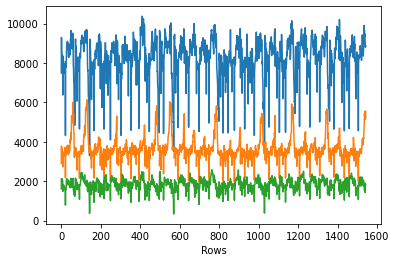

In [75]:
df_basic_stats.Points.plot()
df_basic_stats.Rebounds.plot()
df_basic_stats.Assists.plot()

# Export of the 2 DataFrames to CSV

In [77]:
df_teams.to_csv('teams_index.csv', index=False)

In [78]:
df_basic_stats.to_csv('teams_stats.csv', index=False)